### Illustrate SDSS light curve with Celerite fitting 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import unique
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

#outDir = '../data_products/SDSS-PTF-CRTS-PS1_/'
#done_lcs = os.listdir(outDir)
#done_lcs.remove('.DS_Store')

In [2]:
# Read the summary table with median SDSS, PS1, PTF, CRTS  band magnitude  per object ... 
summary = Table.read('summary_combined_lc_info.txt', format='ascii') 

In [52]:
# Choose the best-sampled  LC 
summary.sort('SDSS_rN')

lcname = summary[-1]['lcname']

In [53]:
lcname

'3104329.txt'

Use 3104329.txt for the experiment .... 

In [64]:
import matplotlib.dates as mdates
from astropy.time import Time

def fit_celerite(time, mag, magerr,axis ):
    ''' Quick convenience function to find the MAP estimate 
    with Celerite , using some standard setup,
    and plot the prediction with "error snake"
    of the mean +/-  stdev  given the data 
    
    Input: 
    -------
    time, mag,  magerr : the light curve for which to 
          find the DRW fitted parameters 
    ax : axis on which to plot the predictions 
    
    Returns : 
    --------
    None 
    
    '''
    # Fit the true combined LC 
    prior='Jeff1' # 1/sigma * 1/tau ..... 
    sig_lims = [0.01,1]
    tau_lims = [1,10000]
    sigma_in = 0.2 ;  tau_in = 575 # starting params for the fit 
    sigmaMAP, tauMAP,gp = mod.find_celerite_MAP(time,mag,magerr,
                              sigma_in, tau_in, prior=prior,set_bounds=True, 
                              sig_lims=sig_lims, tau_lims=tau_lims ,verbose=True)

    
    # plot the observed data ...
    axis.errorbar(time,mag,magerr,fmt=".", capsize=0)
    
    # plot the time .... 
    #t = Time(time, format='mjd')
    #axis.plot_date(t.datetime, mag)
    #axis.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    
    # plot the prediction conditioned on the observed data 
    x = np.linspace(min(time), max(time), 5000)
    pred_mean, pred_var = gp.predict(mag, x, return_var=True)
    pred_std = np.sqrt(pred_var)
    color = "#ff7f0e"
    axis.plot(x, pred_mean, color=color)
    axis.fill_between(x, pred_mean+pred_std, pred_mean-pred_std, 
                     color=color, alpha=0.3,
                     )
    axis.invert_yaxis()
    axis.set_xlabel('time [days]')
    axis.set_ylabel('brightness [mag]')

In [51]:
lcname

lcname,SDSS_uN,SDSS_medianuerr,SDSS_medianumag,SDSS_gN,SDSS_mediangerr,SDSS_mediangmag,SDSS_rN,SDSS_medianrerr,SDSS_medianrmag,SDSS_iN,SDSS_medianierr,SDSS_medianimag,SDSS_zN,SDSS_medianzerr,SDSS_medianzmag,PS1_gN,PS1_mediangerr,PS1_mediangmag,PS1_rN,PS1_medianrerr,PS1_medianrmag,PS1_iN,PS1_medianierr,PS1_medianimag,PS1_zN,PS1_medianzerr,PS1_medianzmag,PS1_yN,PS1_medianyerr,PS1_medianymag,PTF_1N,PTF_median1err,PTF_median1mag,PTF_2N,PTF_median2err,PTF_median2mag,CRTS_wN,CRTS_medianwerr,CRTS_medianwmag
str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3104329.txt,132.0,0.037,19.485,136.0,0.016,19.289,141.0,0.015,19.004,140.0,0.019,18.996,139.0,0.049,19.063,8.0,0.02482465,19.376867,10.0,0.02037465,19.1040785,8.0,0.01952505,19.0862085,9.0,0.0308536,19.117258,11.0,0.0869751,19.043041,0.0,nan,nan,15.0,0.087,19.593,320.0,0.15,18.66


In [68]:
lcname

'3130189.txt'

[-3.21887582 -6.35437004]
sig_lims: [0.01, 1] tau_lims: [1, 10000]
[(-9.2103403719761818, 0.0), (-9.2103403719761818, 0.0)]
sigma_fit 0.128703160954 tau_fit 103.994146336


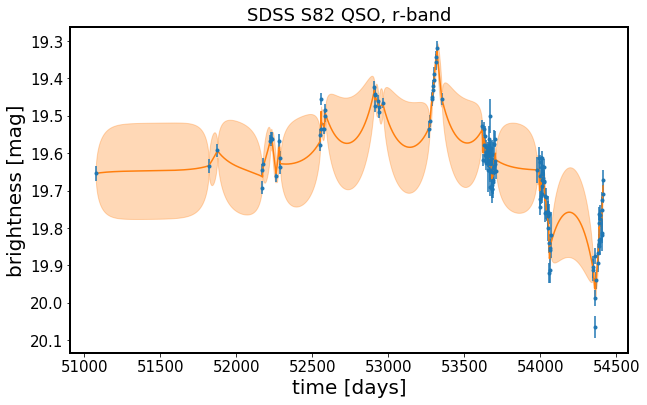

In [67]:
%matplotlib inline

# combined light curves 
lcDir= '../data_products/Combined_LC/'  # only SDSS-r and those from other survyes ... 
# lcDir = '../data_products/SDSS-PTF-CRTS-PS1_2/'  # SDSS ugriz,  etc... 
#lcs=  os.listdir(lcDir)
#i = 0
lcname = summary[-2]['lcname']#  lcs[i]
lc = Table.read(lcDir+lcname, format='ascii')


# select only sdss r portion, fit and show 
m = (lc['originBand'] == 'r' ) & (lc['originSurvey'] == 'sdss')
lcs = lc[m]

# fit with celerite, illustrate...
fig,ax  = plt.subplots(1,1,figsize=(10,6))

fit_celerite(time = lcs['mjd'], mag = lcs['mag'], magerr=lcs['magerr'],
             axis=ax )
ax.set_title('SDSS S82 QSO, r-band')
#fig.autofmt_xdate()
plt.savefig('AB0_SDSS_S82_rband.png', bbox_inches='tight')

[-3.21887582 -6.35437004]
sig_lims: [0.01, 1] tau_lims: [1, 10000]
[(-9.2103403719761818, 0.0), (-9.2103403719761818, 0.0)]
sigma_fit 0.128703160954 tau_fit 103.994146336


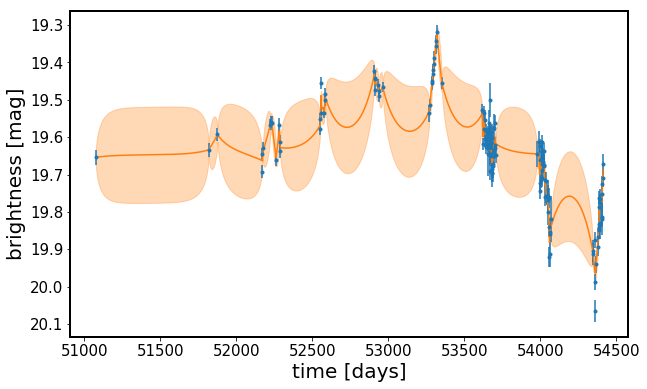

In [34]:
lcs['mag']

20.135
20.143
20.119
20.034
20.083
19.85
19.813
19.794
20.043
20.029
19.927
